## Supplemental code for Toytree manuscript

In [1]:
# conda install toytree -c eaton-lab
# conda install scipy

In [2]:
import toytree
import toyplot
import toyplot.pdf
import toyplot.svg

# used to generate data to add to plots
import numpy as np
import scipy.stats as sc

In [3]:
print(toytree.__version__)

0.2.3


# Figure 1

### Figure 1A

In [4]:
# load tree from URL and root on outgroup
tre = toytree.tree("https://eaton-lab.org/data/Cyathophora.tre")
rtre = tre.root(wildcard="prz")

# default style tree drawing
rtre.draw();

<svg class="toyplot-canvas-Canvas" height="275.0px" id="tf6eb5875b9534f66b741d368548d817e" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 360.0 275.0" width="360.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 38362_rex 39618_rex 35236_rex 35855_rex 40578_rex 30556_thamno 33413_thamno 41478_cyathophylloides 41954_cyathophylloides 30686_cyathophylla 29154_superba 33588_przewalskii 32082_przewalskii

### Figure 1B

This code may look a bit complex, but that is because I wanted to demonstrate how to modify many different styles of the plot in one drawing. You can often make very nice plots using many fewer styling options.

In [5]:
# load tree from URL and root on outgroup
tre = toytree.tree("https://eaton-lab.org/data/Cyathophora.tre")
rtre = tre.root(wildcard="prz")

# add styling to nodes, edges, tips and axes
rtre.draw(
    
    # style tip labels, align, italicize, and trim accession
    tip_labels_align=True,
    tip_labels=[
        "<i>P. {}</i>".format(i.split("_")[1]) 
        for i in rtre.get_tip_labels()
    ],
    
    # style nodes, exclude root and tips
    node_sizes=[
        8 if i else 0 for i in rtre.get_node_values(
        show_tips=False, show_root=False
    )],
    node_colors=[
        "grey" if i==100 else "lightgrey" for i in 
        rtre.get_node_values("support")
    ],
    node_style={"stroke": "#262626"},
    
    # style node labels, shift support values from nodes
    node_labels=rtre.get_node_values("support"),
    node_labels_style={
        "-toyplot-anchor-shift": "-10px",
        "baseline-shift": "5px"
    },
    
    # style edge labels, color descendants of nodes by index
    edge_colors=rtre.get_edge_values_from_dict({
        24: toytree.colors[0], 
        16: toytree.colors[1],
    }),
    
    # add a scale bar to the x axis
    scalebar=True,
);

<svg class="toyplot-canvas-Canvas" height="275.0px" id="t1205f9e62fdf47268571ae2193caa872" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 380.0 275.0" width="380.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> P. rex P. rex P. rex P. rex P. rex P. thamno P. thamno P. cyathophylloides P. cyathophylloides P. cyathophylla P. superba P. przewalskii P. przewalskii 100 96 100 99 100 100 100 100 100 100 100 0.00 0.02 0.04

### Figure 1C

This drawing combines a simple tree plot with a somewhat complex plot of overlapping histograms next to it on the same coordinate grid. The key is setting up to axes objects on the same canvas from the start that have the same range.

In [6]:
# load tree from URL and root on outgroup
tre = toytree.tree("https://eaton-lab.org/data/Cyathophora.tre")
rtre = tre.root(wildcard="prz")

# set up canvas for two panel plot
canvas = toyplot.Canvas(width=300, height=300)
ax0 = canvas.cartesian(
    bounds=(50, 180, 50, 250),
    ymin=0, ymax=rtre.ntips, padding=15)
ax1 = canvas.cartesian(
    bounds=(220, 300, 50, 250), 
    ymin=0, ymax=rtre.ntips, padding=15)

# list of colors
tcols = [toytree.colors[0]] * 7 + [toytree.colors[1]] * 4 + [toytree.colors[2]] * 2

# draw tree with styles tips
rtre.draw(
    axes=ax0, 
    tip_labels_align=True,
    tip_labels_colors=tcols, 
    tip_labels=[i.split("_")[0] for i in rtre.get_tip_labels()],
)
ax0.show = False

# generate a random distribution between -10 and 10 for each tip in the tree
np.random.seed(1234)
points = np.linspace(-10, 10, 50)
dists = {}
for tip in rtre.get_tip_labels():
    dists[tip] = sc.norm.pdf(
        points, 
        loc=np.random.randint(-5, 5, 1), 
        scale=np.random.normal(2, 0.5)
    )

# iterate from top to bottom (ntips to 0) so that plots are stacked
for tip in range(tre.ntips)[::-1]:

    # select color for hist
    color = tcols[tip]

    # get tip name and get hist from dict
    tipname = tre.get_tip_labels()[tip]
    probs = dists[tipname]

    # fill histogram with slightly overlapping histograms
    ax1.fill(
        points, probs / probs.max() * 1.25,
        baseline=[tip] * len(points),
        style={"fill": color, "stroke": "white", "stroke-width": 0.5, "opacity": 0.9},
        title=tipname,
            )

    # add horizontal line at base
    ax1.hlines(tip, opacity=0.5, color="grey", style={"stroke-width": 0.5})
    
ax1.y.show = False

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t2c3d180841aa490788af387729620448" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 300.0 300.0" width="300.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 38362 39618 35236 35855 40578 30556 33413 41478 41954 30686 29154 33588 32082 <polygon points="220.0,65.38461538461537 221.6326530612245,65.38461538461537 223.26530612244898,65.38461538461537 224.89795918367346,65.38461538461537 226.53061224489795,65.38461538461537 228.16326530612244,65.38461538461537 229.79591836734693,65.38461538461537 231.42857142857142,65.38461538461537 233.06122448979593,65.38461538461537 234.69387755102042,65.38461538461537 236.3265306122449,65.38461538461537 237.9591836734694,65.38461538461537 239.59183673469386,65.38461538461537 241.22448979591837,65.38461538461537 242.85714285714283,65.38461538461537 244.48979591836735,65.38461538461537 246.12244897959184,65.38461538461537 247.75510204081633,65.38461538461537 249.38775510204084,65.38461538461537 251.02040816326533,65.38461538461537 252.65306122448982,65.38461538461537 254.28571428571428,65.38461538461537 255.9183673469388,65.38461538461537 257.55102040816325,65.38461538461537 259.1836734693877,65.38461538461537 260.8163265306123,65.38461538461537 262.44897959183675,65.38461538461537 264.0816326530612,65.38461538461537 265.7142857142857,65.38461538461537 267.3469387755102,65.38461538461537 268.9795918367347,65.38461538461537 270.61224489795916,65.38461538461537 272.2448979591837,65.38461538461537 273.8775510204082,65.38461538461537 275.51020408163265,65.38461538461537 277.1428571428571,65.38461538461537 278.7755102040816,65.38461538461537 280.40816326530614,65.38461538461537 282.0408163265306,65.38461538461537 283.6734693877551,65.38461538461537 285.3061224489796,65.38461538461537 286.9387755102041,65.38461538461537 288.57142857142856,65.38461538461537 290.2040816326531,65.38461538461537 291.83673469387753,65.38461538461537 293.46938775510205,65.38461538461537 295.10204081632656,65.38461538461537 296.734693877551,65.38461538461537 298.3673469387755,65.38461538461537 300.0,65.38461538461537 300.0,65.38387843564027 298.3673469387755,65.38316049958364 296.734693877551,65.3818099588482 295.10204081632656,65.37933156799502 293.46938775510205,65.37489517700574 291.83673469387753,65.3671498375058 290.2040816326531,65.35396275783872 288.57142857142856,65.3320703056079 286.9387755102041,65.29663714845984 285.3061224489796,65.24073642085652 283.6734693877551,65.15478989122767 282.0408163265306,65.02604208286238 280.40816326530614,64.83818285099241 278.7755102040816,64.57127189229554 277.1428571428571,64.20214494410084 275.51020408163265,63.70548106144187 273.8775510204082,63.055669301021 272.2448979591837,62.22952155635315 270.61224489795916,61.209735614795434 268.9795918367347,59.988831880204074 267.3469387755102,58.57309738665717 265.7142857142857,56.985913808447464 264.0816326530612,55.26977017528554 262.44897959183675,53.48630808980259 260.8163265306123,51.71394001202505 259.1836734693877,50.04291103437377 257.55102040816325,48.56809658571573 255.9183673469388,47.380265908851584 254.28571428571428,46.55690016620615 252.65306122448982,46.15384615384617 251.02040816326533,46.199052684768205 249.38775510204084,46.68936545390676 247.75510204081633,47.59089101587493 246.12244897959184,48.84287152962088 244.48979591836735,50.36445488010366 242.85714285714283,52.06331244393097 241.22448979591837,53.84483124239776 239.59183673469386,55.62062113677695 237.9591836734694,57.315309217615585 236.3265306122449,58.87097583392877 234.69387755102042,60.24902828164839 233.06122448979593,61.42971702863318 231.42857142857142,62.4098042234468

### Figure 1: A,B,C

This simply combined the tree plots from above onto a shared canvas.

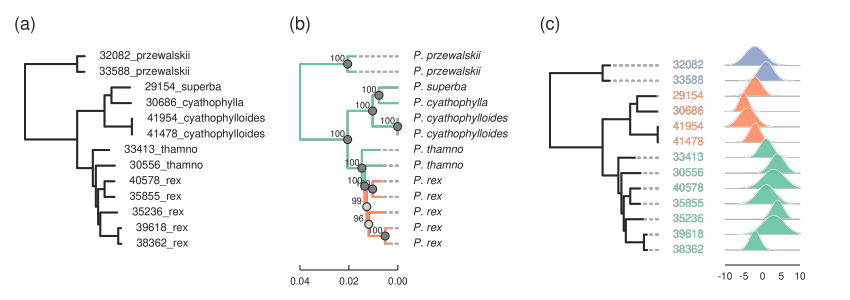

In [7]:
canvas = toyplot.Canvas(width=850, height=300)

ax0 = canvas.cartesian(bounds=(25, 250, 50, 250))
ax1 = canvas.cartesian(bounds=(300, 525, 50, 250))
ax2 = canvas.cartesian(bounds=(550, 685, 50, 250),
                       ymin=0, ymax=rtre.ntips, padding=15)
ax3 = canvas.cartesian(bounds=(725, 800, 50, 250), 
                       ymin=0, ymax=rtre.ntips, padding=15)

# (A) simple tree
rtre.draw(axes=ax0);

# (B) tree with extensive styling
rtre.draw(
    axes=ax1,
    tip_labels_align=True,
    tip_labels=[
        "<i>P. {}</i>".format(i.split("_")[1]) 
        for i in rtre.get_tip_labels()
    ],
    node_sizes=[8 if i else 0 for i in rtre.get_node_values(show_tips=False)],
    node_style={"stroke": "#262626"},
    node_colors=[
        'grey' if i==100 else 'lightgrey' 
        for i in rtre.get_node_values('support')
    ],
    node_labels=rtre.get_node_values('support', show_root=False, show_tips=False),
    node_labels_style={
        "-toyplot-anchor-shift": "-10px",
        "baseline-shift": "5px"
    },
    edge_colors=rtre.get_edge_values_from_dict({
        24: toytree.colors[0], 
        16: toytree.colors[1],
    }),
    scalebar=True,
)

# (C) tree combined with other Toyplot data plots
# get list of tip colors
tcols = [toytree.colors[0]] * 7 + [toytree.colors[1]] * 4 + [toytree.colors[2]] * 2
rtre.draw(
    axes=ax2, 
    tip_labels_align=True,
    tip_labels_colors=tcols,
    tip_labels=[i.split("_")[0] for i in rtre.get_tip_labels()],
)

# add other toyplot plots
# generate a distribution between -10 and 10 for each tip in the tree
np.random.seed(1234)
points = np.linspace(-10, 10, 50)
dists = {}
for tip in rtre.get_tip_labels():
    dists[tip] = sc.norm.pdf(
        points, 
        loc=np.random.randint(-5, 5, 1), 
        scale=np.random.normal(2, 0.5)
    )

# iterate from top to bottom (ntips to 0) so that plots are stacked
for tip in range(tre.ntips)[::-1]:

    # select a color for hist
    color = tcols[tip]

    # get tip name and get hist from dict
    tipname = tre.get_tip_labels()[tip]
    probs = dists[tipname]

    # fill histogram with slightly overlapping histograms
    ax3.fill(
        points, probs / probs.max() * 1.25,
        baseline=[tip] * len(points),
        style={"fill": color, "stroke": "white", "stroke-width": 0.5, "opacity": 0.9},
        title=tipname,
            )

    # add horizontal line at base
    ax3.hlines(tip, opacity=0.5, color="grey", style={"stroke-width": 0.5})

    
ax0.show = False
ax1.y.show = False
ax2.show = False
ax3.y.show = False

# add subfigure text labels to Canvas
canvas.text(25, 25, "(a)", style={"font-size": "18px"});
canvas.text(300, 25, "(b)", style={"font-size": "18px"});
canvas.text(550, 25, "(c)", style={"font-size": "18px"});

# save canvas
toyplot.pdf.render(canvas, "ToyTree-figure.pdf")
toyplot.svg.render(canvas, "ToyTree-figure.svg")
canvas

# Figure 2

### Figure 2AB

In [8]:
tstring = """\
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):1,c:3);
(((a:1,d:1):1,(b:1,e:1):1):1.25,c:3.25);
(((b:1.5,d:1.5):0.75,(a:1,e:1):1.25):1.5,c:3.75);
(((a:1.5,b:1.5):1,(d:1,e:1):1.5):1,c:3.5);
(((a:1.25,b:1.25):0.75,(d:1,e:1):1):1,c:3);
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):1,c:3);
(((a:1,b:1):1,(d:1.5,e:1.5):0.5):2,c:4);
(((a:1.5,b:1.5):0.5,(d:1,e:1):1):1,c:3);
"""

In [9]:
# load trees into a multitree object
mtre = toytree.mtree(tstring)

# draw a grid of trees
mtre.draw_tree_grid(
    nrows=1, ncols=3, start=0,
    width=400,
    height=200,
    edge_type='c',
);

mtre.draw_tree_grid(
    nrows=1, ncols=3, start=0,
    width=400,
    height=200,
    edge_type='c',
    fixed_order=True,
    edge_style={"stroke": "#888888"}
);

<svg class="toyplot-canvas-Canvas" height="200.0px" id="tdc397c41f1544b7cacb5b8e1deca49c3" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 200.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> e d b a c e b d a c e a d b c

<svg class="toyplot-canvas-Canvas" height="200.0px" id="t734c32b2c25347cbb03c58445a2ee66f" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 200.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> e d b a c e d b a c e d b a c

### Figure 2C

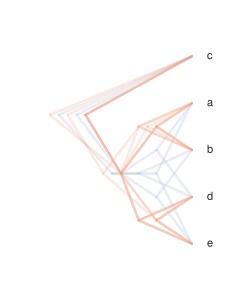

In [10]:
# get consensus tree
mtre = toytree.mtree(tstring)
ctre = mtre.get_consensus_tree().root("c")

# set styles on the individual trees
for tre in mtre.treelist:
    rf = tre.treenode.robinson_foulds(ctre.treenode)[0]
    if rf == 0:
        tre.style.edge_style["stroke"] = toytree.colors[1]
    else:
        tre.style.edge_style["stroke"] = toytree.colors[2]

mtre.draw_cloud_tree(width=250, height=300, edge_style={"stroke-opacity": 0.2});

### Figure 2D

In [11]:
fish = toytree.mtree("https://eaton-lab.org/data/densitree.nex")
print(len(fish))

160


In [12]:
customorder = [
    "Priapella",
    "Psjonesii",
    "Xmayae",
    "Xalvarezi",
    "Xhellerii",
    "Xsignum",
    "Xmonticolus",
    "Xclemenciae_G",
    "Xbirchmanni_GARC",
    "Xmalinche_CHIC2",
    "Xcortezi",
    "Xnezahuacoyotl",
    "Xmontezumae",
    "Xcontinens",
    "Xpygmaeus",
    "Xmultilineatus",
    "Xnigrensis",
    "Xgordoni",
    "Xmeyeri",
    "Xcouchianus",
    "Xxiphidium",
    "Xvariatus",
    "Xevelynae",
    "Xmilleri",
    "Xandersi",
    "Xmaculatus_JpWild",
]

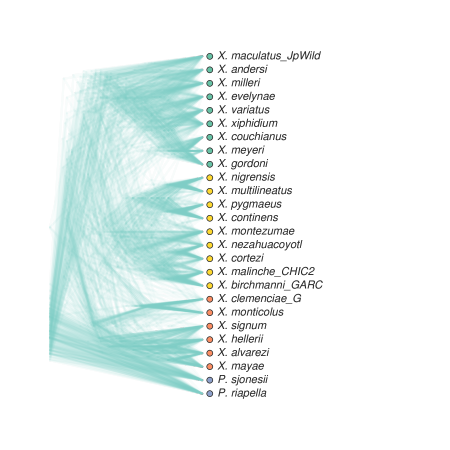

In [13]:
# draw the cloudtree
canvas, axes = fish.draw_cloud_tree(
    height=450,
    width=450,
    edge_style={
        'stroke': toyplot.color.brewer.palette("BlueGreen")[4],
        'opacity': 0.05,
    },
    fixed_order=customorder,
    tip_labels={
        i: "<i>{}. {}</i>".format(i[0], i[1:]) for i in customorder
    }
);

# add colored nodes at the tips (x-axis=0) (y-axis=0-ntips)
xlocs = np.zeros(fish.ntips)
ylocs = np.arange(fish.ntips)
colors = np.concatenate([
    [toytree.colors[2]] * 2,
    [toytree.colors[1]] * 6,
    [toytree.colors[5]] * 9,
    [toytree.colors[0]] * 9,
])
axes.scatterplot(
    xlocs + 0.05,
    ylocs,
    color=colors,
    mstyle={"stroke": "black", "stroke-width": 0.5},
    size=6,
);

### Figure 2 A,B,C,D

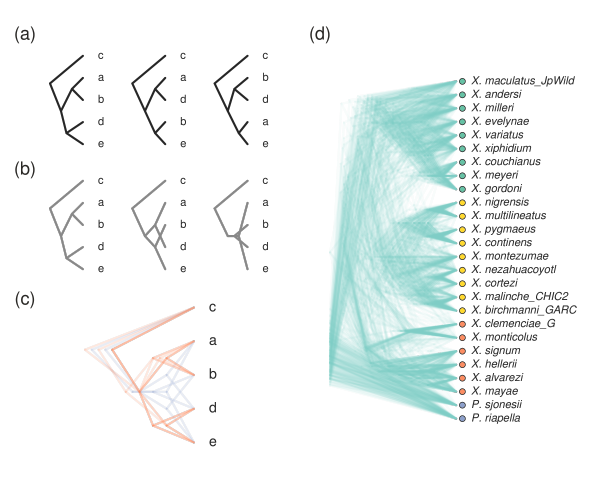

In [15]:
canvas = toyplot.Canvas(width=600, height=500)

axA = canvas.cartesian(bounds=(50, 250, 50, 150))
axB = canvas.cartesian(bounds=(50, 250, 175, 275))
axC = canvas.cartesian(bounds=(85, 200, 300, 450))
axD = canvas.cartesian(bounds=(330, 620, 75, 425))

# FIGURE 2AB
# load trees into a multitree object
mtre = toytree.mtree(tstring)

# tree grid
mtre.draw_tree_grid(
    axes=axA, 
    ncols=3, nrows=1,
    layout='right',
    edge_type='c', 
    xbaseline=2.5,
    edge_style={"stroke": "#262626"},
)
mtre.draw_tree_grid(
    axes=axB, 
    ncols=3, nrows=1,
    layout='right', 
    edge_type='c', 
    xbaseline=2.5,
    fixed_order=True,
    edge_style={"stroke": "#888888"},
)
    
# FIGURE 2C
# set styles on the individual trees
for tre in mtre.treelist:
    rf = tre.treenode.robinson_foulds(ctre.treenode)[0]
    if rf == 0:
        tre.style.edge_style["stroke"] = toytree.colors[1]
    else:
        tre.style.edge_style["stroke"] = toytree.colors[2]

mtre.draw_cloud_tree(
    axes=axC, 
    edge_style={"stroke-opacity": 0.2},
    tip_labels_style={"font-size": "14px"}
)

# FIGURE 2D (fish and customorder defined above)
fish.draw_cloud_tree(
    axes=axD,
    edge_style={
        'stroke': toyplot.color.brewer.palette("BlueGreen")[4],
        'opacity': 0.05,
    },
    fixed_order=customorder,
    tip_labels={
        i: "<i>{}. {}</i>".format(i[0], i[1:]) for i in customorder
    },
    tip_labels_style={"font-size": "11px"},
);

# add colored nodes at the tips (x-axis=0) (y-axis=0-ntips)
xlocs = np.zeros(fish.ntips)
ylocs = np.arange(fish.ntips)
colors = np.concatenate([
    [toytree.colors[2]] * 2,
    [toytree.colors[1]] * 6,
    [toytree.colors[5]] * 9,
    [toytree.colors[0]] * 9,
])
axD.scatterplot(
    xlocs + 0.05,
    ylocs,
    color=colors,
    mstyle={"stroke": "black", "stroke-width": 0.5},
    size=6,
);

# add subfigure text labels to Canvas
canvas.text(25, 35, "(a)", style={"font-size": "18px"});
canvas.text(25, 170, "(b)", style={"font-size": "18px"});
canvas.text(25, 300, "(c)", style={"font-size": "18px"});
canvas.text(320, 35, "(d)", style={"font-size": "18px"});

# save canvas in PDF SVG
toyplot.pdf.render(canvas, "MultiTree-figure.pdf")
toyplot.svg.render(canvas, "MultiTree-figure.svg")
canvas